# Running Basic Animations with mplanimations

Here I will go through how to create a very simple animation with mplanimations.

Import the necessary modules.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import mplanimations

Set up the plots that will be used in the animations.

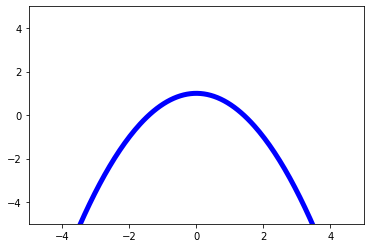

In [2]:
t = np.linspace(-5, 5, 200)

fig, ax = plt.subplots()

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

line, = ax.plot(t, 1-(t**2)/2, c='blue', lw=5)

The output above is the initial graph that will begin the animation. We now need to instantiate some instances of the Transitions class of mplanimations that we will be using. I like to do this in a list, even if I only need a single instance; accessing the class instances in this way makes for a convenient numbering system in the animation function.

In [3]:
ts = [mplanimations.Transitions() for i in range(3)]

We are now ready to create the animation function. In this case, I am showing the increasing accuracy of the Taylor series for $\cos x$, so I will show what happens when the next term in the series is added, and then finally show what the graph $y=\cos x$ looks like itself. Finally, the line will fade away with an alpha transition.

In [4]:
def animate(i):
    ts[0].line_transition(i, 1, 1-(t**2)/2, 1-(t**2)/2+(t**4)/24, line)
    ts[1].line_transition(i, 3, 1-(t**2)/2+(t**4)/24, np.cos(t), line)
    ts[2].alpha_transition(i, 5, 1, 0, line)
    
ani = animation.FuncAnimation(fig, animate, interval=20, frames=300)

These are very simple functions and the documentation for each is available in the README. The last line is simply the standard matplotlib line used in creating animations.

The animation function is now created. The idea in this module is that we simply have one line of code clearly labeled (and conveniently numbered) to create each animation, and this is what we have here in this function. In many animations (such as the Huygen's Principle animation) it is possible to significantly shorten the code, but really all of them are going through this process, even if it is inside a for loop or something similar.

In a Jupyter Notebook, we can easily show this animation with the line of code that follows, but for best results it is ideal to render the animation using some video writer (I use ImageMagik).

In [5]:
from IPython.display import HTML
HTML(ani.to_jshtml())

For the plot to actually be playable, this file will have to be downloaded; GitHub does not support interactive features in Jupyter Notebooks.

So thats it: a very simple animation created with mplanimations. Only a couple functions were shown here, but they all follow a similar process. The actions of the functions themselves are really quite simple, but they open up some huge diversity that can be used in creating animations and simulations in matplotlib. Indeed combining many functions and using the great customizability inherent in matplotlib can create some wonderful animations.